You are givin with the dataset that provides the list of passengers. Please answer the following questions. Here's a brief description of the dataset. 

- survival: Survival (0 = no; 1 = yes)
- class: Passenger class (1 = first; 2 = second; 3 = third)
- name: Name
- sex: Sex
- age: Age
- sibsp: Number of siblings/spouses aboard
- parch: Number of parents/children aboard
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin
- embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat: Lifeboat (if survived)
- body: Body number (if did not survive and body was recovered)


In [1]:
# The usual preamble
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('hw2_dataset.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## 1. How many passengers survived this disaster

In [2]:
df['survived'] = list(map(lambda x : str(int(x)) if (pd.isna(x) == False) else x , df['survived']))
df['survived'].str.contains("1")

0        True
1        True
2       False
3       False
4       False
        ...  
1305    False
1306    False
1307    False
1308    False
1309      NaN
Name: survived, Length: 1310, dtype: object

In [3]:
# NaN 값 제외
temp = df['survived'].str.contains("1").dropna()

# True : 1이라는 뜻으로 살아남음
# False : 0이라는 뜻으로 죽음
## 재앙으로부터 살아남은 사람 수를 물어보는 것이기에 True에 개수가 답
sum(temp)

500

## 2. How many bodies are missing? 

In [4]:
# NaN인 값들의 True , False로 구분한 뒤 더하면 True == 1 False == 0으로 계산이 되어 더하면 missing 개수를 알 수 있음
sum(df['body'].isna())

1189

## 3. Plot the distribution of the age of passengers. 

C:\Users\math-01\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\math-01\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.1667 ,  8.15003, 16.13336, 24.11669, 32.10002, 40.08335,
        48.06668, 56.05001, 64.03334, 72.01667, 80.     ]),
 <a list of 10 Patch objects>)

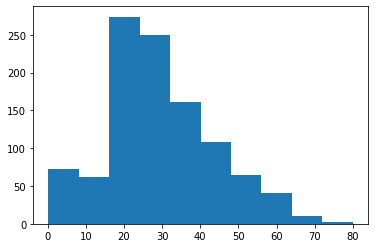

In [5]:
plt.hist(df['age'])

## 4. Plot the distribution of the passenger fares.

(array([1070.,  154.,   42.,    4.,   21.,   13.,    0.,    0.,    0.,
           4.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

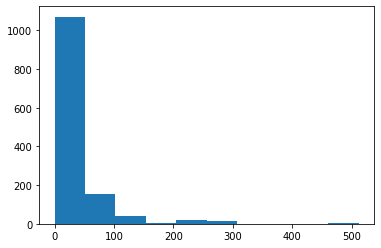

In [6]:
plt.hist(df['fare'])

## 5. Which lifeboat was most succesful in rescuing survivors? 

In [7]:
temp_df_5 = df[ df['boat'].isna() == False ]

(array([64., 80., 45., 43., 50., 72., 81.,  3., 43.,  5.]),
 array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. , 15.6, 18.2, 20.8, 23.4, 26. ]),
 <a list of 10 Patch objects>)

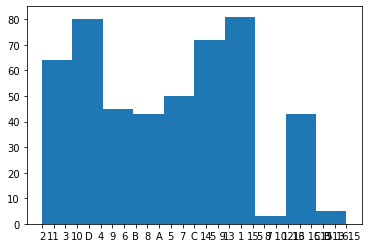

In [8]:
plt.hist(temp_df_5['boat'])

## 6. Did female passengers have higher chances of being rescued? 

In [9]:
temp_df_6_fm = df[ (df['sex'] == 'female') ]
temp_df_6_m = df[ (df['sex'] == 'male') ]

In [10]:
len(temp_df_6_fm) + len(temp_df_6_m) == len(df)

False

In [11]:
df['sex'].unique()

array(['female', 'male', nan], dtype=object)

In [12]:
len(temp_df_6_fm) + len(temp_df_6_m) + sum(df['sex'].isna()) == len(df) 

True

In [13]:
print(len(temp_df_6_fm), len(temp_df_6_m))

466 843


In [14]:
fm_chance = len(temp_df_6_fm[temp_df_6_fm['survived'] == '1']) /len(temp_df_6_fm)
m_chance = len(temp_df_6_m[temp_df_6_m['survived'] == '1']) /len(temp_df_6_m)

In [15]:
print("Female survived higher than male")
print(fm_chance,">", m_chance)

Female survived higher than male
0.7274678111587983 > 0.19098457888493475


## 7. Did anything else affected survival rate? Do not answer with yes/no. Please support your answers. 

In [16]:
columns_list = list(df.columns)

In [17]:
columns_list.remove('survived')

In [18]:
max_probability = []
for i in columns_list :
    
    temp_df_list = []
    temp_probability = []
    
    temp_columns = np.array(df[i].unique())
    
    for j in temp_columns :
        
        temp_df_list.append(df[df[i] == j] )
        temp_probability.append( len(df[df[i] == j]) / len(df[i]) )

    max_probability.append(max(temp_probability))
    #print(i," : ", temp_probability)

In [19]:
max_probability

[0.5412213740458015,
 0.0015267175572519084,
 0.6435114503816793,
 0.03587786259541985,
 0.6801526717557251,
 0.7648854961832061,
 0.008396946564885497,
 0.04580152671755725,
 0.004580152671755725,
 0.6977099236641221,
 0.029770992366412213,
 0.0007633587786259542,
 0.04885496183206107]

## 이 중에서 비율이 0.5 초과인 것들만 추리면

In [20]:
max_probability_index = []
for i in range(len(np.array(max_probability)[np.array(max_probability) > 0.5])) :
    max_probability_index.append(max_probability.index(list(np.array(max_probability)[np.array(max_probability) > 0.5])[i]))

In [21]:
max_probability_index

[0, 2, 4, 5, 9]

In [22]:
np.array(columns_list)[max_probability_index]

array(['pclass', 'sex', 'sibsp', 'parch', 'embarked'], dtype='<U9')

In [23]:
np.array(max_probability)[max_probability_index]

array([0.54122137, 0.64351145, 0.68015267, 0.7648855 , 0.69770992])

## 'pclass', 'sex', 'sibsp', 'parch', 'embarked' 들이 영향이 큰 class를 갖고 있는 변수들 입니다.

# 상관분석

## str형 값들에 대한 dummy 필요

In [24]:
df2 = df.copy()

In [25]:
temp_corr_list = []
temp_corr_list_index = []
for i in columns_list :
    
    if ( (type(list(df2[i].unique())[0]) == str ) ) :
        continue
    
    ss = df2.loc[:, ['survived', i ] ].dropna()

    if(len(ss.loc[:, 'survived'].unique()) == 1) :
        continue
        
    ss['survived'] = list(map(lambda x : int(x), ss['survived']))
    
    temp_corr_list.append( ss.corr().iloc[0,1] )
    temp_corr_list_index.append(columns_list.index(i))
temp_corr_list

[-0.31246936264968,
 -0.05551252019214702,
 -0.02782511923058273,
 0.0826595703861011,
 0.24426546891481296]

In [26]:
temp_corr_list_index

[0, 3, 4, 5, 7]

# 범주형인 변수들 제외하고 보면 상관계수가 유의미한 변수는 없음.

## 추후 문자형으로 되어있는 변수들을 dummy화하여 진행하여 다시 확인